In [42]:
# Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

In [66]:
# Loading the DataSet
car_data = pd.read_csv("Car details v3.csv")

## Exploratory Data Analysis (Part a)

In [67]:
# Inspecting head of the data
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [68]:
# Describing the data to view summary statistics
car_data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [71]:
len(car_data['engine'].unique())

122

In [69]:
# Check for missing values of the data
missing_values = car_data.isna().sum()

# Display columns with missing values and their counts
missing_data = missing_values[missing_values > 0]
if not missing_data.empty:
    print("Columns with Missing Values:")
    print(missing_data)
else:
    print("No Missing Data. Go Ahead with your analysis")


Columns with Missing Values:
mileage      221
engine       221
max_power    215
torque       222
seats        221
dtype: int64


In [63]:
# Outlier Analysis via BoxPlot

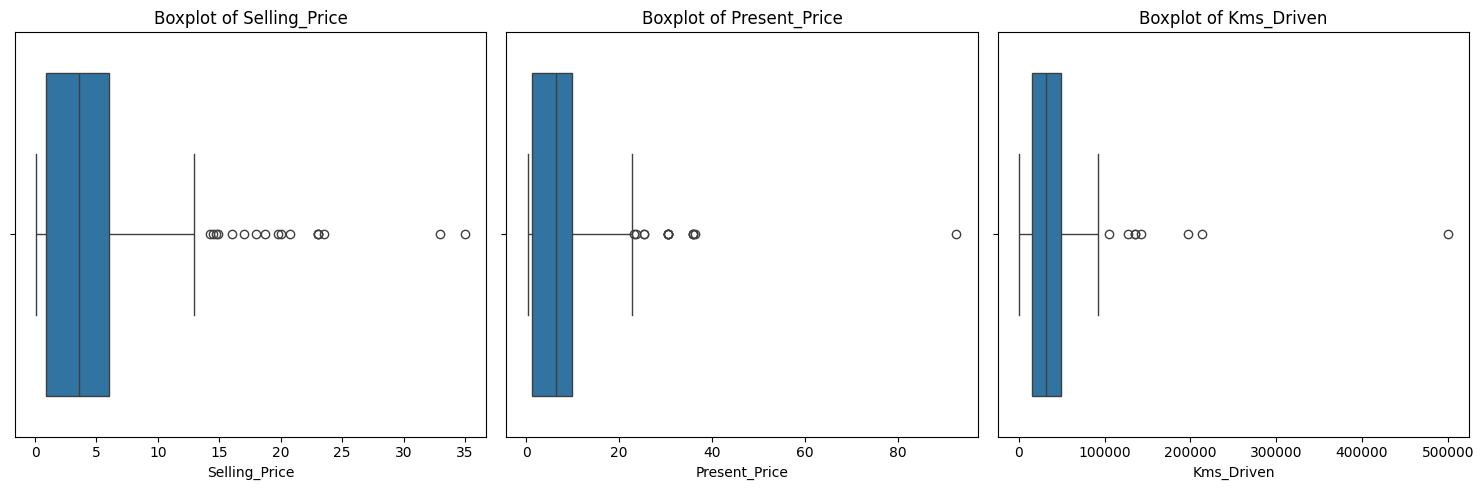

In [64]:
# Define the columns for boxplot visualization
columns = ['Selling_Price', 'Present_Price', 'Kms_Driven']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

# Iterate over each column and create a boxplot
for i, column in enumerate(columns):
    sns.boxplot(x=car_data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [8]:
# Checking some Outlier Values

In [9]:
car_data[car_data['Selling_Price']> 25]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0


In [10]:
car_data[car_data['Present_Price']> 25]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
79,fortuner,2012,14.50,30.61,89000,Diesel,Dealer,Automatic,0
82,innova,2017,23.00,25.39,15000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0


In [11]:
car_data[car_data['Kms_Driven']> 200000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [12]:
### Conclusion on Outliers: It looks good. Selling Price high for expensive vehicles; Present Value high for expensive and less driven vehicles; KMS high for older vehicles

In [13]:
# Data Normalisation - For numerical columns

In [14]:
numeric_columns = ['Year', 'Present_Price', 'Kms_Driven']
X = car_data.drop('Selling_Price', axis=1)
y = car_data['Selling_Price']

# Initialize and fit the MinMaxScaler on the feature variables
scaler = MinMaxScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Fit and transform the target variable (Selling_Price)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [15]:
# One-Hot Encoding - For categorical columns

In [16]:
# Assuming 'car_data' is your DataFrame containing the dataset
categorical_cols = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Perform one-hot encoding on categorical columns
encoded_data = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [17]:
# Inspect the data after normalisation and one-hot encoding

In [18]:
encoded_data.head()

,Year,Present_Price,Kms_Driven,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,...,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3
0,0.733333,0.057109,0.053053,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0.666667,0.099913,0.085085,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,0.933333,0.103273,0.012813,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,0.533333,0.041504,0.009409,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
4,0.733333,0.070980,0.083984,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


## Data Split (Part B)

In [19]:
# Extract features (X) and target (y)
X = encoded_data
y = y_scaled

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Print the sizes of the training and testing sets
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")

# Assuming X_train and X_test are your input feature arrays
X_train = X_train.astype('float32')  # Convert to float32
X_test = X_test.astype('float32')    # Convert to float32

Number of training samples: 60
Number of testing samples: 241


## Model Designing and Training (Part C)

In [21]:
# A basic network with input layer of 64 neurons with relu activation (numerical Y); hidden layer of 32 neurons with relu activation; and single output later

In [22]:
# setting input shape
# Assuming X_train and y_train are your training features and labels
input_shape = X_train.shape[1:]  # Input shape based on number of features

In [37]:
def create_feedforward_nn(input_shape, 
                          num_hidden_layers=2, 
                          hidden_layer_units=[64, 32], 
                          activations='relu',
                          learning_rate=0.01, 
                          batch_size=32,
                          loss='mse', 
                          optimizer='adam',
                          metrics=['mae']):
    
    model = keras.Sequential()
    
    # Adding input layer
    model.add(layers.Dense(hidden_layer_units[0], 
                           input_shape=input_shape, 
                           activation=activations))
    
    # Adding hidden layers
    for i in range(1, num_hidden_layers):
        model.add(layers.Dense(hidden_layer_units[i], activation=activations))
    
    # Adding output layer
    model.add(layers.Dense(1))  # Output layer for regression (single output neuron)

    # Create optimizer object based on the specified optimizer string
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")
        
    # Compile the model
    model.compile(
        optimizer=opt,
        loss=loss,  # Set loss function
        metrics=metrics  # Set evaluation metric
    )
    
    return model

In [24]:
## Run Model

In [54]:
# Define custom parameters
custom_params = {
    'num_hidden_layers': 3,
    'hidden_layer_units': [64, 32, 16],
    'activations': 'relu',
    'learning_rate': 0.001,
    'batch_size': 64,
    'loss': 'mse',
    'optimizer': 'adam',
    'metrics': ['mae']
}

# Create the custom feedforward neural network model
model = create_feedforward_nn(input_shape=input_shape, **custom_params)

# Display the model architecture
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,           # Number of epochs
    batch_size=32,       # Batch size
    validation_split=0.2  # Validation split for monitoring validation performance during training
)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 64)                6848      
                                                                 
 dense_157 (Dense)           (None, 32)                2080      
                                                                 
 dense_158 (Dense)           (None, 16)                528       
                                                                 
 dense_159 (Dense)           (None, 1)                 17        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 4s 624ms/step - loss: 0.0358 - mae: 0.1444 - val_loss: 0.0171 - val_mae: 0.1080
Epoch 2/50
2/2 [==============================] - 0s 

## Hyper parameter tuning & Model Evaluation

In [26]:
# Create a list to store evaluation results for different hyperparameter settings
evaluation_results = []

# Define hyperparameter settings to test
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
epochs = [100, 200, 300]

# Iterate over all combinations of hyperparameters
for lr in learning_rates:
    for bs in batch_sizes:
        for ep in epochs:
            print(f"Training with learning rate={lr}, batch size={bs}, epochs={ep}")
            
            # Create and compile the model using custom hyperparameters
            custom_params = {
                'learning_rate': lr,
                'batch_size': bs,
                'loss': 'mse',
                'optimizer': tf.keras.optimizers.Adam,  # Using Adam optimizer
                'metrics': ['mae']
            }
            model = create_feedforward_nn(input_shape=X_train.shape[1:], **custom_params)
            
            # Train the model
            history = model.fit(
                X_train, y_train,
                epochs=ep,
                batch_size=bs,
                validation_split=0.2,
                verbose=0  # Set verbose to 0 to suppress training output
            )
            
            # Evaluate the model on test data
            loss, mae = model.evaluate(X_test, y_test, verbose=0)
            
            # Store evaluation results
            evaluation_results.append({
                'learning_rate': lr,
                'batch_size': bs,
                'epochs': ep,
                'mse': loss,
                'mae': mae
            })
            
            print(f"Test Mean Absolute Error: {mae:.2f}, Test Mean Squared Error: {loss:.2f}")
            print()

# Find the best hyperparameter setting based on minimum MAE
best_result = min(evaluation_results, key=lambda x: x['mae'])

print("Best hyperparameter setting:")
print(best_result)

Training with learning rate=0.001, batch size=16, epochs=100
Test Mean Absolute Error: 0.08, Test Mean Squared Error: 0.01

Training with learning rate=0.001, batch size=16, epochs=200
Test Mean Absolute Error: 0.07, Test Mean Squared Error: 0.01

Training with learning rate=0.001, batch size=16, epochs=300
Test Mean Absolute Error: 0.06, Test Mean Squared Error: 0.01

Training with learning rate=0.001, batch size=32, epochs=100
Test Mean Absolute Error: 0.07, Test Mean Squared Error: 0.01

Training with learning rate=0.001, batch size=32, epochs=200
Test Mean Absolute Error: 0.06, Test Mean Squared Error: 0.01

Training with learning rate=0.001, batch size=32, epochs=300
Test Mean Absolute Error: 0.07, Test Mean Squared Error: 0.01

Training with learning rate=0.001, batch size=64, epochs=100
Test Mean Absolute Error: 0.08, Test Mean Squared Error: 0.01

Training with learning rate=0.001, batch size=64, epochs=200
Test Mean Absolute Error: 0.08, Test Mean Squared Error: 0.01

Training

In [ ]:
# Train Model with best setting and evaluate

In [55]:
lr = best_result['learning_rate']
br = best_result['batch_size']
ep = best_result['epochs']

# Create and compile the model using custom hyperparameters
custom_params = {
    'learning_rate': lr,
    'batch_size': bs,
    'loss': 'mse',
    'optimizer': 'adam',  # Using Adam optimizer
    'metrics': ['mae']
}
model = create_feedforward_nn(input_shape=X_train.shape[1:], **custom_params)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=ep,
    batch_size=bs,
    validation_split=0.2,
    verbose=0  # Set verbose to 0 to suppress training output
)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


8/8 [==============================] - 0s 4ms/step - loss: 0.0086 - mae: 0.0575
Test Mean Absolute Error: 0.06
8/8 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 0.06
Root Mean Squared Error (RMSE): 0.09


In [31]:
# # Reshape y_pred to (n,)
# y_pred = np.squeeze(y_pred)  # Ensure y_pred is in the shape (n,)

# # Inverse transform the predicted values to original scale for the target column ('Selling_Price')
# y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()  # Reshape for inverse transform

# # Reshape y_test to (n,)
# y_test = y_test.reshape(-1)  # No need to use .values as y_test is already a numpy array

# # Inverse transform the true values (y_test) to original scale for the target column ('Selling_Price')
# y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()  # Reshape for inverse transform

# # Create a DataFrame for comparison
# comparison_df = pd.DataFrame({
#     'Actual_Selling_Price': y_test_orig,
#     'Predicted_Selling_Price': y_pred_orig
# })

# # Display the comparison DataFrame
# print(comparison_df)


     Actual_Selling_Price  Predicted_Selling_Price
0                    0.35                 3.287114
1                   10.11                 8.989779
2                    4.95                 9.654574
3                    0.15                 0.119750
4                    6.95                 7.889143
..                    ...                      ...
236                  0.12                 2.263254
237                  2.25                 3.791745
238                  1.05                 2.140963
239                  4.00                 6.299023
240                  4.00                 3.433231

[241 rows x 2 columns]


## Test with Different architectures

In [40]:
# defining different architectures
# Define different architectures to try
architecture_configs = [
    {
        'num_hidden_layers': 2,
        'hidden_layer_units': [64, 32],
        'activations': 'relu',
        'learning_rate': lr
    },
    {
        'num_hidden_layers': 2,
        'hidden_layer_units': [64, 32],
        'activations': 'tanh',
        'learning_rate': lr
    },
    
    {
        'num_hidden_layers': 3,
        'hidden_layer_units': [128, 64, 32],
        'activations': 'relu',
        'learning_rate': lr
    },
    {
        'num_hidden_layers': 3,
        'hidden_layer_units': [128, 64, 32],
        'activations': 'tanh',
        'learning_rate': lr
    },

    {
        'num_hidden_layers': 3,
        'hidden_layer_units': [64, 64, 64],
        'activations': 'relu',
        'learning_rate': lr
    },
    {
        'num_hidden_layers': 3,
        'hidden_layer_units': [64, 64, 64],
        'activations': 'tanh',
        'learning_rate': lr
    },

    {
        'num_hidden_layers': 4,
        'hidden_layer_units': [64, 64, 32, 32],
        'activations': 'relu',
        'learning_rate': lr
    },
    {
        'num_hidden_layers': 4,
        'hidden_layer_units': [64, 64, 32, 32],
        'activations': 'tanh',
        'learning_rate': lr
    },
]

In [41]:
results = []

# Iterate over each architecture configuration
for idx, config in enumerate(architecture_configs):
    print(f"Running experiment {idx + 1}/{len(architecture_configs)} with configuration: {config}")
    
    # Create and compile the model
    model = create_feedforward_nn(input_shape=input_shape, **config)
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=ep,            # Number of epochs
        batch_size=br,         # Batch size
        validation_split=0.2,  # Validation split for monitoring validation performance during training
        verbose=0
    )
    
    # Evaluate the model on test data
    loss, mae = model.evaluate(X_test, y_test)
    print(f"Test Mean Absolute Error: {mae:.2f}")
    
    # Store the results (architecture configuration and evaluation metrics)
    results.append({
        'configuration': config,
        'loss': loss,
        'mae': mae
    })

# Find the best configuration based on Mean Absolute Error (MAE)
best_config = min(results, key=lambda x: x['mae'])
print(f"\nBest Configuration (based on MAE): {best_config['configuration']}")
print(f"Test MAE: {best_config['mae']:.2f}")

Running experiment 1/8 with configuration: {'num_hidden_layers': 2, 'hidden_layer_units': [64, 32], 'activations': 'relu', 'learning_rate': 0.01}
8/8 [==============================] - 1s 5ms/step - loss: 0.0071 - mae: 0.0616
Test Mean Absolute Error: 0.06
Running experiment 2/8 with configuration: {'num_hidden_layers': 2, 'hidden_layer_units': [64, 32], 'activations': 'tanh', 'learning_rate': 0.01}
8/8 [==============================] - 1s 5ms/step - loss: 0.0092 - mae: 0.0683
Test Mean Absolute Error: 0.07
Running experiment 3/8 with configuration: {'num_hidden_layers': 3, 'hidden_layer_units': [128, 64, 32], 'activations': 'relu', 'learning_rate': 0.01}
8/8 [==============================] - 1s 5ms/step - loss: 0.0067 - mae: 0.0505
Test Mean Absolute Error: 0.05
Running experiment 4/8 with configuration: {'num_hidden_layers': 3, 'hidden_layer_units': [128, 64, 32], 'activations': 'tanh', 'learning_rate': 0.01}
8/8 [==============================] - 1s 5ms/step - loss: 0.0082 - mae: 

In [50]:
config = best_config['configuration']
# extracting the best parameters
num_hidden_layers  = config['num_hidden_layers']
hidden_layer_units = config['hidden_layer_units']
activation         = config['activations']

In [57]:
# Define custom parameters
custom_params = {
    'num_hidden_layers': num_hidden_layers,
    'hidden_layer_units': hidden_layer_units,
    'activations': activation,
    'learning_rate': lr,
    'batch_size': br,
    'loss': 'mse',
    'optimizer': 'adam',
    'metrics': ['mae']
}

# Create the custom feedforward neural network model
model = create_feedforward_nn(input_shape=input_shape, **custom_params)

# Function to evaluate model with given settings
def evaluate_model(X_train, X_test, y_train, y_test, settings):
    model = create_feedforward_nn(input_shape, **settings)
    model.summary()
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,           # Number of epochs
        batch_size=32,       # Batch size
        validation_split=0.2,  # Validation split for monitoring validation performance during training
        verbose=0
    )
    
    # Evaluate the model on test data
    loss, mae = model.evaluate(X_test, y_test)
    print(f"Test Mean Absolute Error: {mae:.2f}")
    
    return loss, mae

In [235]:
## With Regularisation

In [ ]:
def create_feedforward_nn(input_shape, learning_rate=0.01, dropout_rate=0.2, l2_penalty=0.001):
    model = keras.Sequential([
        layers.Dense(64, input_shape=input_shape, activation='relu', kernel_regularizer=l2(l2_penalty)),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu', kernel_regularizer=l2(l2_penalty)),
        layers.Dropout(dropout_rate),
        layers.Dense(1)  # Output layer for regression (single output neuron)
    ])
    
    # Compile the model with specified learning rate in the optimizer
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss='mse',        # Loss function: Mean Squared Error (MSE) for regression
        metrics=['mae']    # Metric: Mean Absolute Error (MAE)
    )
    
    return model

# Assuming X_train and y_train are your training features and labels
input_shape = X_train.shape[1:]  # Input shape based on number of features

# Create the feedforward neural network with regularization and dropout
model = create_feedforward_nn(input_shape)

# Display the model architecture
model.summary()

# Train the model with regularization and dropout
history = model.fit(
    X_train, y_train,
    epochs=50,           # Number of epochs
    batch_size=32,       # Batch size
    validation_split=0.2  # Validation split for monitoring validation performance during training
)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")
